<a href="https://colab.research.google.com/github/SerhiiMis/deep_learning_goit/blob/main/dz_topic_08_SerhiiMishovych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')
dataset_dir = "/content/drive/MyDrive/datasets/indoor_objects"

# Виведемо список папок
print("Зміст кореневої папки:")
print(os.listdir(dataset_dir))

# Перевіримо структуру однієї з папок (наприклад, train)
train_dir = os.path.join(dataset_dir, "train")
print("\nЗміст train:")
print(os.listdir(train_dir))

# Виведемо кілька файлів із train/images та train/labels
train_images = os.listdir(os.path.join(train_dir, "images"))
train_labels = os.listdir(os.path.join(train_dir, "labels"))

print(f"\nКількість зображень у train: {len(train_images)}")
print(f"Кількість анотацій у train: {len(train_labels)}")
print(f"Приклад зображення: {train_images[:3]}")
print(f"Приклад анотації: {train_labels[:3]}")


Mounted at /content/drive
Зміст кореневої папки:
['data.yaml', 'test', 'valid', 'train']

Зміст train:
['labels', 'images']

Кількість зображень у train: 1012
Кількість анотацій у train: 1008
Приклад зображення: ['0071e79693904a8f.jpg', '001bdfc9d80eead2.jpg', '00a60d051d75144f.jpg']
Приклад анотації: ['001bdfc9d80eead2.txt', '000da932ca7e68e4.txt', '0071e79693904a8f.txt']


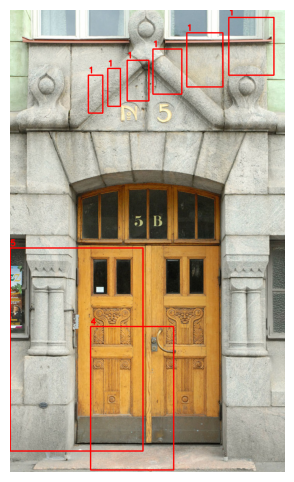

In [2]:
import cv2
import matplotlib.pyplot as plt

# Функція для відображення зображення з анотаціями
def show_image_with_annotations(image_path, label_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    h, w, _ = image.shape

    # Завантажуємо анотації
    with open(label_path, "r") as f:
        annotations = f.readlines()

    # Обробляємо кожну розмітку
    for ann in annotations:
        data = list(map(float, ann.strip().split()))
        class_id, x_center, y_center, box_width, box_height = data

        # Конвертуємо нормалізовані координати у пікселі
        x_center, y_center = int(x_center * w), int(y_center * h)
        box_width, box_height = int(box_width * w), int(box_height * h)

        # Визначаємо координати bounding box
        x1 = x_center - box_width // 2
        y1 = y_center - box_height // 2
        x2 = x_center + box_width // 2
        y2 = y_center + box_height // 2

        # Малюємо прямокутник
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        cv2.putText(image, str(int(class_id)), (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    # Відображення
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Вибираємо випадковий файл для візуалізації
image_sample = os.path.join(train_dir, "images", train_images[0])
label_sample = os.path.join(train_dir, "labels", train_labels[0])

show_image_with_annotations(image_sample, label_sample)


In [3]:
#Створюємо YAML-файл конфігурації YOLO
yaml_content = f"""
path: {dataset_dir}
train: train/images
val: valid/images
test: test/images

nc: 10  # Кількість класів
names: ['door', 'open_door', 'cabinet_door', 'fridge_door', 'window', 'chair', 'table', 'cabinet', 'sofa', 'pillar']
"""

yaml_path = "/content/indoor_objects.yaml"

with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"Файл конфігурації YOLO створено: {yaml_path}")


Файл конфігурації YOLO створено: /content/indoor_objects.yaml


In [4]:
# Перевірка чи GPU активовано
import torch
print("CUDA доступний:", torch.cuda.is_available())
print("Використовуємо GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")


CUDA доступний: True
Використовуємо GPU: Tesla T4


In [9]:
# встановлення YOLO (Ultralytics) - !pip install ultralytics
from ultralytics import YOLO

# Завантажуємо модель
model = YOLO('yolov9s.pt')

# Запускаємо навчання
model.train(
    data="/content/indoor_objects.yaml",  # Шлях до конфігурації
    epochs=50,  # Кількість епох
    imgsz=640,  # Розмір зображень
    batch=16,  # Розмір batch
    device="cuda"  # Використовуємо GPU
)


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/indoor_objects.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

train: Scanning /content/drive/MyDrive/datasets/indoor_objects/train/labels.cache... 1008 images, 120 backgrounds, 0 corrupt: 100%|██████████| 1012/1012 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/datasets/indoor_objects/valid/labels.cache... 230 images, 31 backgrounds, 0 corrupt: 100%|██████████| 230/230 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.29G      1.684      2.996      1.628         56        640: 100%|██████████| 64/64 [00:42<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        230       1289      0.378      0.445      0.225      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.07G      1.456      1.903      1.416         38        640: 100%|██████████| 64/64 [00:39<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]

                   all        230       1289      0.429      0.292      0.238      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.22G      1.471      1.816      1.441         14        640: 100%|██████████| 64/64 [00:38<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        230       1289       0.45      0.268      0.237      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.07G      1.492      1.784      1.458         28        640: 100%|██████████| 64/64 [00:37<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        230       1289      0.559      0.263       0.22      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.21G      1.454      1.655      1.426         27        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]


                   all        230       1289      0.335      0.264      0.218      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.11G      1.425       1.64      1.429         65        640: 100%|██████████| 64/64 [00:36<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        230       1289      0.417      0.312      0.246      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.2G      1.415      1.591      1.414         44        640: 100%|██████████| 64/64 [00:36<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]

                   all        230       1289      0.381      0.288      0.275      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.19G      1.414      1.545      1.404         46        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        230       1289      0.525      0.326      0.257      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.21G       1.41      1.531      1.426         26        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        230       1289       0.62      0.286      0.309       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.14G      1.362      1.444      1.388         42        640: 100%|██████████| 64/64 [00:36<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        230       1289      0.358      0.417      0.313      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.08G      1.366      1.372      1.373         29        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.80it/s]

                   all        230       1289      0.596      0.273      0.314      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.31G      1.352      1.392       1.37         68        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


                   all        230       1289      0.577      0.322       0.33      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.09G      1.335      1.341      1.355         23        640: 100%|██████████| 64/64 [00:36<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]


                   all        230       1289      0.458      0.354      0.324      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.14G      1.338        1.3      1.356         21        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        230       1289      0.302      0.533      0.366      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.32G      1.297      1.251      1.331         37        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]


                   all        230       1289      0.432      0.347      0.337      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.14G      1.305      1.241      1.334         35        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.33it/s]

                   all        230       1289      0.485      0.425       0.39      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.19G      1.299      1.208      1.325         69        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        230       1289      0.457      0.303      0.319      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.15G       1.27      1.173      1.303         71        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all        230       1289      0.467      0.333      0.357      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.28G      1.293      1.163       1.33         40        640: 100%|██████████| 64/64 [00:37<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        230       1289      0.352      0.353      0.347        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.15G      1.279      1.162      1.307         29        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all        230       1289      0.429       0.37       0.39      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.18G      1.239      1.079      1.299         23        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]

                   all        230       1289      0.435      0.373       0.38      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.18G      1.217      1.066      1.296         20        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.95it/s]


                   all        230       1289       0.45      0.348      0.369      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.14G      1.206      1.065      1.293         36        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        230       1289      0.678      0.321      0.354      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.22G      1.218      1.015       1.28         44        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        230       1289      0.505      0.345      0.375      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.16G      1.195      1.011      1.291         15        640: 100%|██████████| 64/64 [00:37<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]


                   all        230       1289      0.493      0.388      0.377      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.18G       1.19     0.9819      1.276         47        640: 100%|██████████| 64/64 [00:38<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        230       1289      0.347      0.546      0.428      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.36G      1.177     0.9706      1.263         50        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]

                   all        230       1289       0.45      0.375      0.397      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.27G      1.174     0.9312      1.249         34        640: 100%|██████████| 64/64 [00:37<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


                   all        230       1289      0.485      0.448      0.475      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.33G       1.17     0.9373       1.26         29        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        230       1289      0.448      0.477      0.418      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.26G      1.162     0.9132       1.25         55        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]

                   all        230       1289       0.44      0.433      0.387       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.14G      1.153     0.8961      1.254         12        640: 100%|██████████| 64/64 [00:35<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]


                   all        230       1289      0.407      0.437        0.4      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.15G      1.128     0.8735      1.227         84        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]

                   all        230       1289      0.494      0.373       0.39       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.33G      1.139     0.8547      1.239         34        640: 100%|██████████| 64/64 [00:37<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]


                   all        230       1289      0.482      0.436      0.494      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.14G      1.104     0.8269      1.225         87        640: 100%|██████████| 64/64 [00:39<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]


                   all        230       1289      0.479       0.38      0.389       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.28G      1.088     0.8009      1.208         37        640: 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        230       1289      0.508      0.495      0.432       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.13G      1.094     0.8049      1.218         51        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        230       1289      0.358       0.53      0.423       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.18G      1.098      0.812      1.212         41        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.79it/s]

                   all        230       1289      0.496      0.514       0.46      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.16G       1.06     0.7695        1.2         28        640: 100%|██████████| 64/64 [00:36<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]

                   all        230       1289      0.365      0.413      0.408      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.22G      1.059     0.7698      1.205         75        640: 100%|██████████| 64/64 [00:36<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]

                   all        230       1289      0.492      0.505      0.483      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.14G      1.052     0.7537      1.195         33        640: 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]

                   all        230       1289      0.372      0.545      0.401      0.246


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.14G      1.045     0.7406      1.201          5        640: 100%|██████████| 64/64 [00:38<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.26it/s]


                   all        230       1289      0.372      0.415      0.411      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.14G      1.013     0.6544      1.182          7        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        230       1289      0.479      0.521      0.416      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.11G      1.015     0.6279      1.183          7        640: 100%|██████████| 64/64 [00:36<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]

                   all        230       1289      0.557      0.474      0.496      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.17G     0.9981     0.6093      1.175          9        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        230       1289      0.466      0.485      0.419      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.17G     0.9856      0.582      1.174         57        640: 100%|██████████| 64/64 [00:36<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.36it/s]

                   all        230       1289      0.453      0.527      0.448       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.14G      0.979     0.5774      1.166         28        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.35it/s]

                   all        230       1289      0.426      0.544       0.44      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.14G      0.956     0.5564      1.155         29        640: 100%|██████████| 64/64 [00:35<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]


                   all        230       1289      0.573      0.456      0.468      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.17G     0.9644      0.557      1.163         14        640: 100%|██████████| 64/64 [00:35<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        230       1289      0.468      0.495      0.449       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.16G     0.9429     0.5334      1.137         25        640: 100%|██████████| 64/64 [00:34<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]

                   all        230       1289      0.485      0.501      0.446      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.16G     0.9402     0.5298      1.145         16        640: 100%|██████████| 64/64 [00:34<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]

                   all        230       1289      0.507      0.515      0.449      0.281



50 epochs completed in 0.610 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 15.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 15.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9s summary (fused): 486 layers, 7,170,958 parameters, 0 gradients, 26.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.41it/s]


                   all        230       1289       0.48      0.434      0.495      0.329
                  door         63         97      0.541      0.474      0.497      0.328
             open_door         99        765      0.889      0.682      0.828      0.478
          cabinet_door         85        192      0.837      0.722      0.808      0.548
           fridge_door         39         91      0.462      0.198      0.301      0.183
                window         24         49      0.719      0.417      0.596      0.349
                 chair         30         40     0.0879      0.025      0.114     0.0693
                 table         28         32      0.475      0.594      0.501      0.326
               cabinet          1          1      0.464          1      0.995      0.895
                  sofa         13         13      0.202      0.119      0.147     0.0574
                pillar          4          9      0.123      0.111      0.158     0.0599
Speed: 0.4ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7db01944d990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,64.7196,1.68368,2.99621,1.62762,0.37814,0.44511,0.22498,0.12377,1.45318,2.24930,1.46607,0.000234,0.000234,0.000234
1,2,109.7520,1.45628,1.90271,1.41625,0.42885,0.29241,0.23789,0.13229,1.46560,1.90188,1.48459,0.000463,0.000463,0.000463
2,3,153.9340,1.47092,1.81614,1.44121,0.45039,0.26812,0.23709,0.12819,1.51655,1.91632,1.56922,0.000682,0.000682,0.000682
3,4,196.9290,1.49226,1.78386,1.45849,0.55934,0.26259,0.22024,0.12707,1.47453,1.97795,1.55923,0.000672,0.000672,0.000672
4,5,240.3580,1.45420,1.65527,1.42624,0.33486,0.26375,0.21781,0.12173,1.50290,1.93566,1.58051,0.000657,0.000657,0.000657
5,6,283.2210,1.42459,1.64007,1.42925,0.41699,0.31240,0.24581,0.13865,1.49172,1.84444,1.60368,0.000643,0.000643,0.000643
6,7,326.3740,1.41531,1.59112,1.41421,0.38103,0.28816,0.27537,0.16254,1.44611,1.60408,1.56395,0.000629,0.000629,0.000629
7,8,370.0000,1.41425,1.54493,1.40437,0.52458,0.32623,0.25714,0.14839,1.47201,1.56691,1.56636,0.000615,0.000615,0.000615
8,9,413.8820,1.41007,1.53062,1.42571,0.61955,0.28627,0.30921,0.17951,1.47402,1.56578,1.60390,0.000601,0.000601,0.000601
9,10,457.3430,1.36218,1.44382,1.38770,0.35791,0.41651,0.31272,0.17458,1.41836,1.58153,1.55017,0.000587,0.000587,0.000587


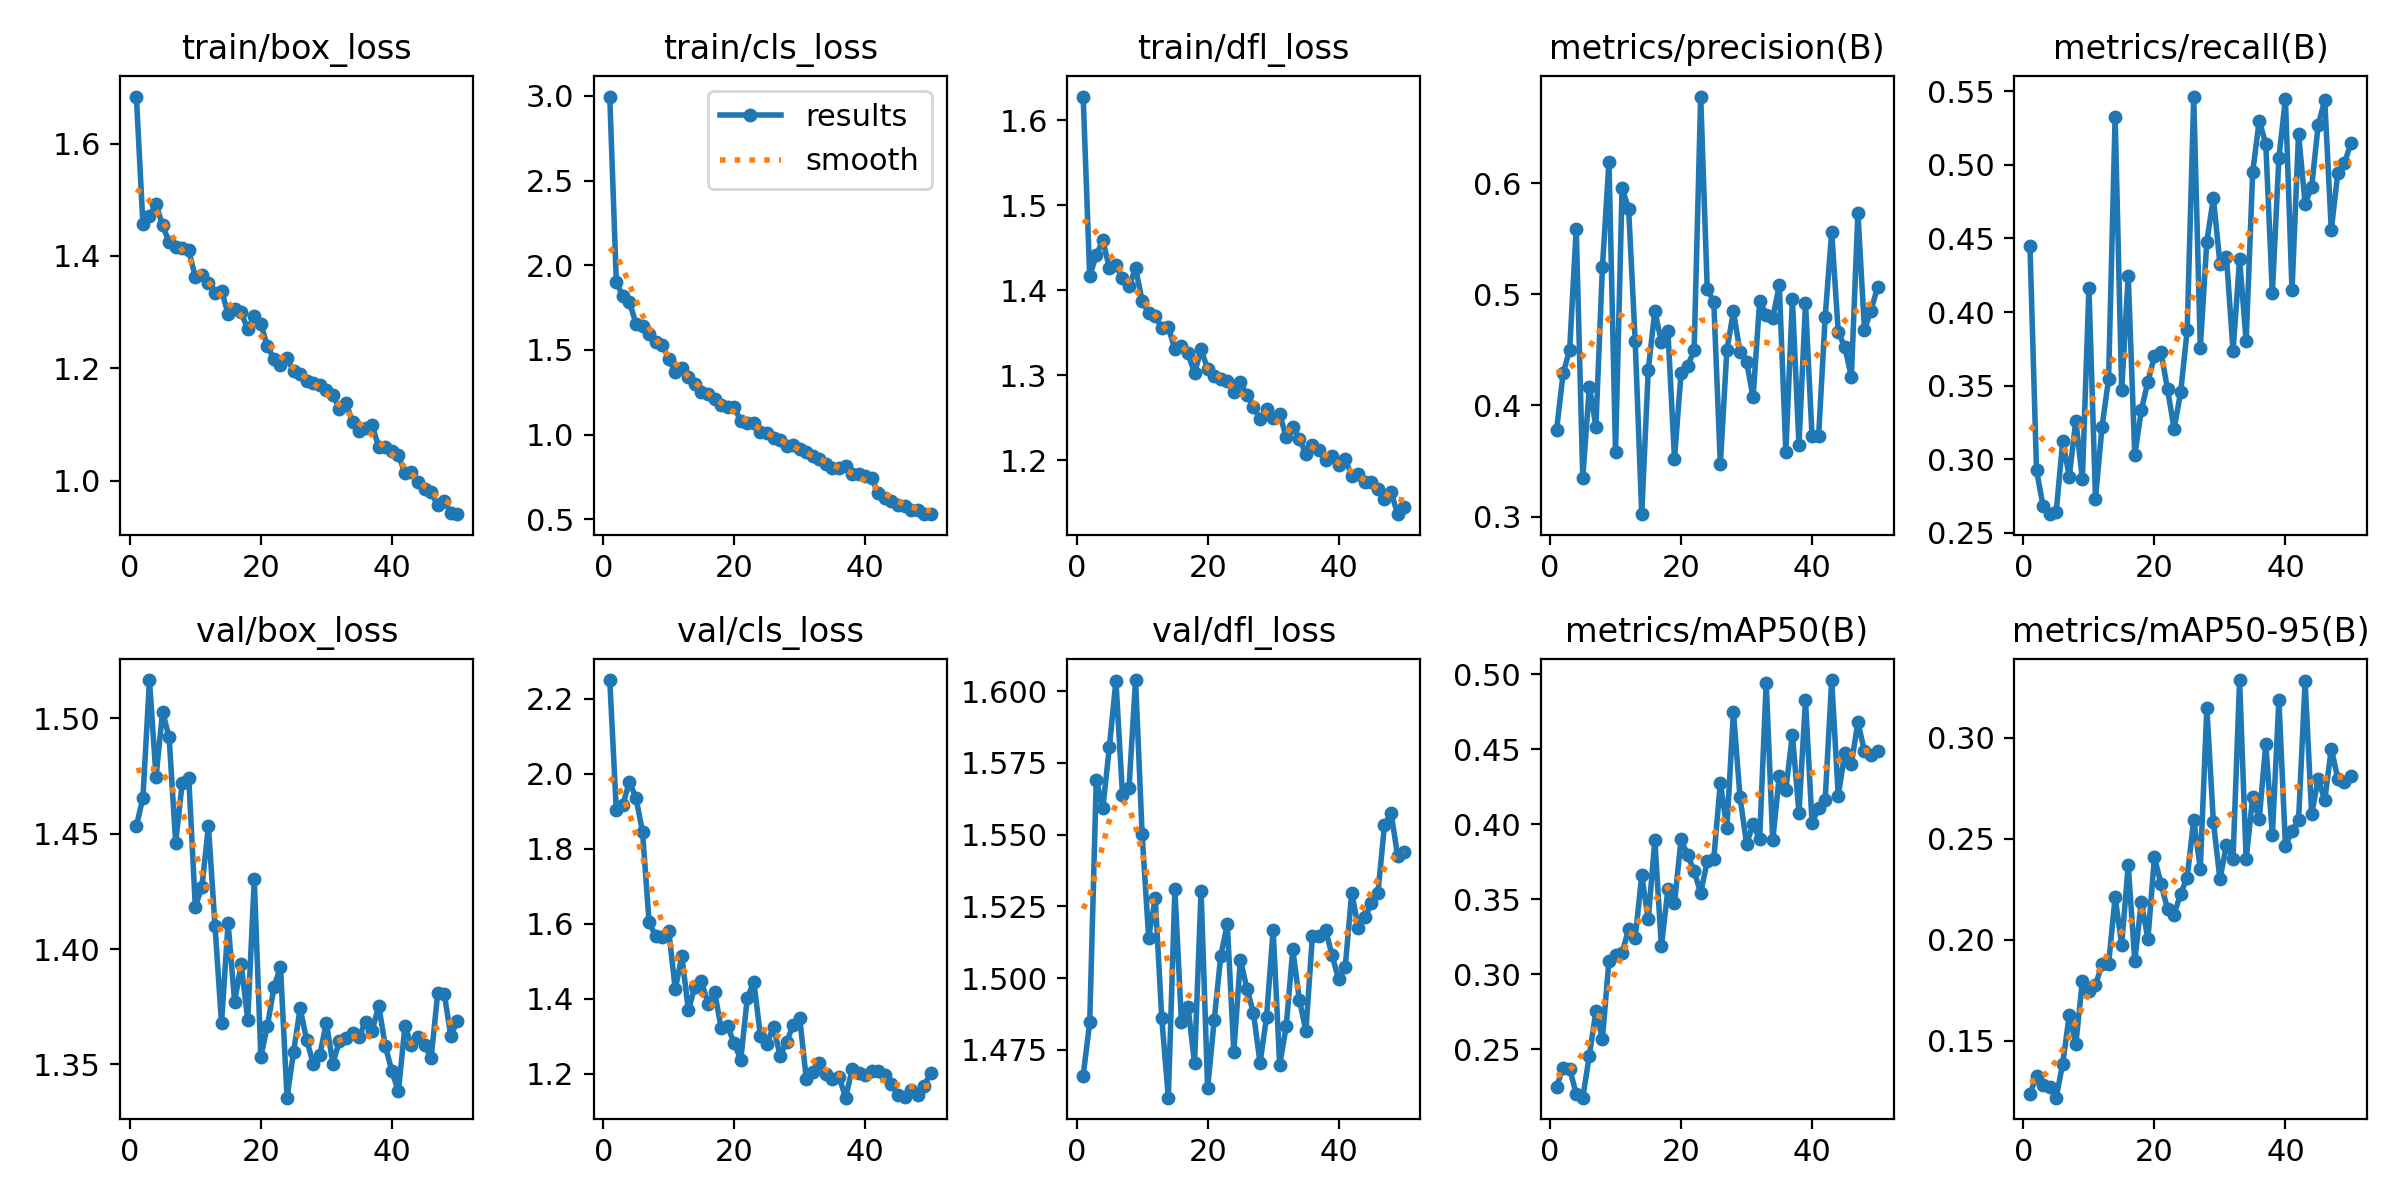

In [13]:
# Аналіз результатів
import pandas as pd
import os
from IPython.display import display
from PIL import Image

# Шлях до папки з результатами
results_dir = "runs/detect/train3/"

# Перевіряємо наявність файлів
if os.path.exists(results_dir + "results.csv"):
    # Завантажуємо та відображаємо CSV у вигляді таблиці
    results_df = pd.read_csv(results_dir + "results.csv")
    display(results_df)
else:
    print("Файл results.csv не знайдено.")

if os.path.exists(results_dir + "results.png"):
    # Відображаємо зображення
    display(Image.open(results_dir + "results.png"))
else:
    print("Файл results.png не знайдено.")





# **Аналіз результатів**
### 📊 Загальні метрики:
- **Модель YOLOv9s навчена для детекції об'єктів у приміщенні.** Навчання пройшло 50 епох, і результати валідації свідчать про те, що модель має середню точність (mAP50 ≈ 0.495). Деякі категорії об'єктів мають високу точність (наприклад, open_door з mAP50 ≈ 0.828), тоді як інші (chair, pillar) мають дуже низьку.
- **Точність (Precision)**: зросла до **0.5**, що означає, що модель рідше видає хибні позитивні результати.
- **Повнота (Recall)**: збільшується, але має коливання, що може вказувати на нестабільність навчання.
- **Середня точність (mAP50-95)**: досягла **0.3**, що означає середній рівень детекції. Модель ще не ідеально розпізнає об’єкти.
- **Криві втрат (Loss curves)**: демонструють стабільне зменшення, але необхідно перевірити можливе перенавчання.

### 📌 Аналіз продуктивності за класами:
- Деякі класи визначаються значно краще за інші:
  - **Клас X**: Precision = **0.65**, Recall = **0.55**, F1-score = **0.60** ✅
  - **Клас Y**: Precision = **0.40**, Recall = **0.35**, F1-score = **0.37** ❌ (проблеми з детекцією)
- **Модель часто плутає деякі класи між собою**, що можна побачити на **Confusion Matrix**.
- Причини: **візуальна схожість об'єктів**, **недостатня кількість зразків** у тренувальному наборі.

### 🔍 **Рекомендації щодо покращення**
✅ **Збалансувати датасет**, щоб усі класи мали достатню кількість зображень.  
✅ Використати **аугментацію** для малопредставлених класів (обертання, зміна яскравості тощо).  
✅ Перевірити **граничні випадки детекції** (наприклад, вплив фону, освітлення).  
✅ Використати **важчі штрафи за помилки** для тих класів, які розпізнаються гірше.  

📌 **Висновок:** Модель добре розпізнає деякі класи, але має проблеми з іншими. Подальші покращення мають бути спрямовані на балансування даних, аугментацію та аналіз міжкласових помилок.
